In [1]:

import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt


#逆温度
beta=15

#ω_n
n=np.arange(-1000,1001)
w_n=np.pi*(2*n+1)/beta

#t
t=np.linspace(0,beta,101)

"""
def G_iwn(self_energy_iwn):
    # 二重指数型積分を用いてG_iwnを求める。
    h=1/400#刻み幅
    #二重指数型積分の和の上下 
    N_minus=-1000
    N_plus=1000
    k=np.arange(N_minus,N_plus+1)
    #行列とベクトルに分離して、積を取る。
    g_matrix=1/(np.fromfunction(lambda i,j:1J*(np.pi*(2*(i-(len(n)-1)/2)+1)/beta)-2*np.tanh(np.pi/2*np.sinh((j+N_minus)*h)) , (len(n),N_plus-N_minus+1))-self_energy_iwn.reshape(-1,1))   
    h_vector=np.cosh(k*h)/((np.cosh(np.pi/2*np.sinh(k*h)))**3)
    G_iwn=h*np.dot(g_matrix,h_vector)
    print(G_iwn)

self_energy_iwn=np.zeros_like(w_n)
G_iwn = np.frompyfunc(G_iwn, len(self_energy_iwn),len(self_energy_iwn))
G_iwn(self_energy_iwn)

"""

def Self_energy_iwn(U):
    # 二重指数型積分を用いてG_iwnを求める。
    h=1/200#刻み幅
    #二重指数型積分の和の上下 
    N_minus=-1000
    N_plus=1000
    
    g_matrix=1/(np.fromfunction(lambda i,j:1J*(np.pi*(2*(i-(len(n)-1)/2)+1)/beta)-2*np.tanh(np.pi/2*np.sinh((j+N_minus)*h)) , (len(n),N_plus-N_minus+1))-self_energy_iwn.reshape(-1,1))
    k=np.arange(N_minus,N_plus+1)
    h_vector=np.cosh(k*h)/((np.cosh(np.pi/2*np.sinh(k*h)))**3)
    G_iwn=h*np.dot(g_matrix,h_vector)
    
    #キャビティーグリーン関数を導出。
    cavity_g_iwn=1/(1/G_iwn+self_energy_iwn)
    
    #キャビティーグリーン関数を逆フーリエ変換して、iwn表示からt表示に変換。
    i_matrix=np.fromfunction(lambda i,j:np.exp(-1J*np.pi*(2*(j-(len(n)-1)/2)+1)*i/(len(t)-1)), (len(t),len(n)))
    cavity_g_t=1/beta*np.dot(i_matrix,cavity_g_iwn-1/(1J*w_n))-1/2
    
    #キャビティーグリーン関数を使って、新たな自己エネルギー（t表示）を導出。
    new_self_energy_t=(U**2)*(cavity_g_t**2)*cavity_g_t[::-1]
    
    #上で導出された新たな自己エネルギーをフーリエ変換して、t表示からiwn表示に変換。計算の精度を高めるために、スプライン補正を行う。
    #Nは０からbetaまでの分割数。Tは補正後の０からbetaまでの点。
    N=10000
    T=np.delete(np.linspace(0,beta,N+1), N)
    self_energy = interp1d(t, new_self_energy_t, kind="cubic")
    j_matrix=np.fromfunction(lambda i,j:np.exp(1J*np.pi*(2*(i+N_minus)+1)*(j)/N) ,(N_plus-N_minus+1,N))
    new_self_energy_iwn=beta/N*np.dot(j_matrix,self_energy(T))
    return new_self_energy_iwn


#new_self_energy_iwnをどれだけ組み込むか。0<=k<=1.
k=0.3

self_energy_iwn=np.zeros_like(w_n)

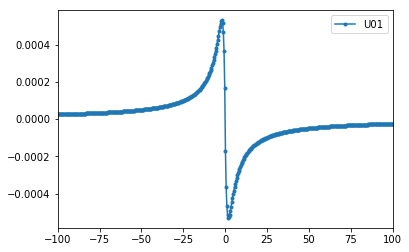

In [2]:
#U=0.1の計算開始
#自己エネルギー。初期値0
#self_energy_iwn=np.zeros_like(w_n)
new_self_energy_iwn_U01=Self_energy_iwn(0.1)
relative_error_U01=np.abs((new_self_energy_iwn_U01-self_energy_iwn).imag/(new_self_energy_iwn_U01.imag))
#相対誤差が０.００0１より小さくなるまでループ
while(np.max(relative_error_U01)>10**(-4)):
    new_self_energy_iwn_U01=Self_energy_iwn(0.1)
    relative_error_U01=np.abs((new_self_energy_iwn_U01-self_energy_iwn).imag/(new_self_energy_iwn_U01.imag))
    self_energy_iwn=k*new_self_energy_iwn_U01+(1-k)*self_energy_iwn
self_energy_iwn_U01=self_energy_iwn
#U=0.1の計算終了


plt.plot(w_n, self_energy_iwn_U01.imag, label='U01', marker=".")
plt.xlim([-100,100]) 
plt.legend()
plt.show()

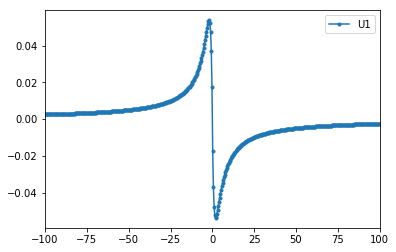

In [3]:
#U=1の計算開始
#自己エネルギー。初期値0
#self_energy_iwn=np.zeros_like(w_n)
new_self_energy_iwn_U1=Self_energy_iwn(1)
relative_error_U1=np.abs((new_self_energy_iwn_U1-self_energy_iwn).imag/(new_self_energy_iwn_U1.imag))
#相対誤差が０.００0１より小さくなるまでループ
while(np.max(relative_error_U1)>10**(-4)):
    new_self_energy_iwn_U1=Self_energy_iwn(1)
    relative_error_U1=np.abs((new_self_energy_iwn_U1-self_energy_iwn).imag/(new_self_energy_iwn_U1.imag))
    self_energy_iwn=k*new_self_energy_iwn_U1+(1-k)*self_energy_iwn
self_energy_iwn_U1=self_energy_iwn
#U=1の計算終了

plt.plot(w_n, self_energy_iwn_U1.imag, label='U1', marker=".")
plt.xlim([-100,100]) 
plt.legend()
plt.show()


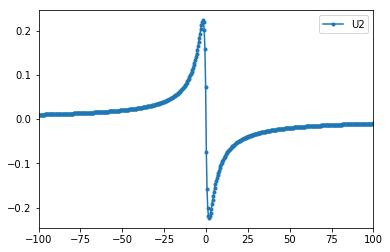

In [4]:
#U=2の計算開始
#自己エネルギー。初期値0
#self_energy_iwn=np.zeros_like(w_n)
new_self_energy_iwn_U2=Self_energy_iwn(2)
relative_error_U2=np.abs((new_self_energy_iwn_U2-self_energy_iwn).imag/(new_self_energy_iwn_U2.imag))
#相対誤差が０.００0１より小さくなるまでループ
while(np.max(relative_error_U2)>10**(-4)):
    new_self_energy_iwn_U2=Self_energy_iwn(2)
    relative_error_U2=np.abs((new_self_energy_iwn_U2-self_energy_iwn).imag/(new_self_energy_iwn_U2.imag))
    self_energy_iwn=k*new_self_energy_iwn_U2+(1-k)*self_energy_iwn
self_energy_iwn_U2=self_energy_iwn
#U=1の計算終了

plt.plot(w_n, self_energy_iwn_U2.imag, label='U2', marker=".")
plt.xlim([-100,100]) 
plt.legend()
plt.show()


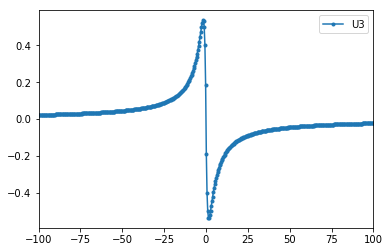

In [5]:
#U=3の計算開始
#自己エネルギー。初期値0
#self_energy_iwn=np.zeros_like(w_n)
new_self_energy_iwn_U3=Self_energy_iwn(3)
relative_error_U3=np.abs((new_self_energy_iwn_U3-self_energy_iwn).imag/(new_self_energy_iwn_U3.imag))
#相対誤差が０.００0１より小さくなるまでループ
while(np.max(relative_error_U3)>10**(-4)):
    new_self_energy_iwn_U3=Self_energy_iwn(3)
    relative_error_U3=np.abs((new_self_energy_iwn_U3-self_energy_iwn).imag/(new_self_energy_iwn_U3.imag))
    self_energy_iwn=k*new_self_energy_iwn_U3+(1-k)*self_energy_iwn
self_energy_iwn_U3=self_energy_iwn
#U=3の計算終了

plt.plot(w_n, self_energy_iwn_U3.imag, label='U3', marker=".")
plt.xlim([-100,100]) 
plt.legend()
plt.show()


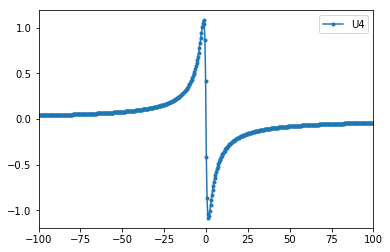

In [6]:
#U=4の計算開始
#自己エネルギー。初期値0
#self_energy_iwn=np.zeros_like(w_n)
new_self_energy_iwn_U4=Self_energy_iwn(4)
relative_error_U4=np.abs((new_self_energy_iwn_U4-self_energy_iwn).imag/(new_self_energy_iwn_U4.imag))
#相対誤差が０.００0１より小さくなるまでループ
while(np.max(relative_error_U4)>10**(-4)):
    new_self_energy_iwn_U4=Self_energy_iwn(4)
    relative_error_U4=np.abs((new_self_energy_iwn_U4-self_energy_iwn).imag/(new_self_energy_iwn_U4.imag))
    self_energy_iwn=k*new_self_energy_iwn_U4+(1-k)*self_energy_iwn
self_energy_iwn_U4=self_energy_iwn
#U=4の計算終了

plt.plot(w_n, self_energy_iwn_U4.imag, label='U4', marker=".")
plt.xlim([-100,100]) 
plt.legend()
plt.show()


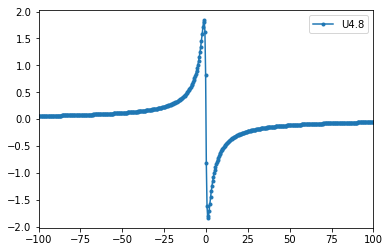

In [7]:
#U=4.8の計算開始
#自己エネルギー。初期値0
#self_energy_iwn=np.zeros_like(w_n)
new_self_energy_iwn_U48=Self_energy_iwn(4.8)
relative_error_U48=np.abs((new_self_energy_iwn_U48-self_energy_iwn).imag/(new_self_energy_iwn_U48.imag))
#相対誤差が０.００0１より小さくなるまでループ
while(np.max(relative_error_U48)>10**(-4)):
    new_self_energy_iwn_U48=Self_energy_iwn(4.8)
    relative_error_U48=np.abs((new_self_energy_iwn_U48-self_energy_iwn).imag/(new_self_energy_iwn_U48.imag))
    self_energy_iwn=k*new_self_energy_iwn_U48+(1-k)*self_energy_iwn
self_energy_iwn_U48=self_energy_iwn
#U=4の計算終了

plt.plot(w_n, self_energy_iwn_U48.imag, label='U4.8', marker=".")
plt.xlim([-100,100]) 
plt.legend()
plt.show()


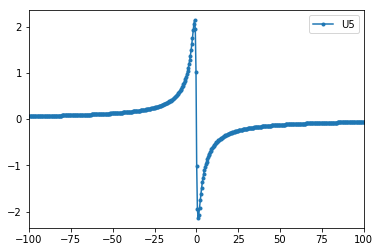

In [25]:
#U=5の計算開始
#自己エネルギー。初期値0
#self_energy_iwn=np.zeros_like(w_n)
new_self_energy_iwn_U5=Self_energy_iwn(5)
relative_error_U5=np.abs((new_self_energy_iwn_U5-self_energy_iwn).imag/(new_self_energy_iwn_U5.imag))
#相対誤差が０.００0１より小さくなるまでループ
while(np.max(relative_error_U5)>10**(-4)):
    new_self_energy_iwn_U5=Self_energy_iwn(5)
    relative_error_U5=np.abs((new_self_energy_iwn_U5-self_energy_iwn).imag/(new_self_energy_iwn_U5.imag))
    self_energy_iwn=k*new_self_energy_iwn_U5+(1-k)*self_energy_iwn
self_energy_iwn_U5=self_energy_iwn
#U=4の計算終了

plt.plot(w_n, self_energy_iwn_U5.imag, label='U5', marker=".")
plt.xlim([-100,100]) 
plt.legend()
plt.show()


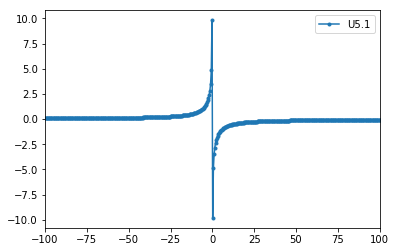

In [24]:
#U=5.1の計算開始
#自己エネルギー。初期値0
#self_energy_iwn=np.zeros_like(w_n)
new_self_energy_iwn_U51=Self_energy_iwn(5.1)
relative_error_U51=np.abs((new_self_energy_iwn_U51-self_energy_iwn).imag/(new_self_energy_iwn_U51.imag))
#相対誤差が０.００0１より小さくなるまでループ
while(np.max(relative_error_U51)>10**(-4)):
    new_self_energy_iwn_U51=Self_energy_iwn(5.1)
    relative_error_U51=np.abs((new_self_energy_iwn_U51-self_energy_iwn).imag/(new_self_energy_iwn_U51.imag))
    self_energy_iwn=k*new_self_energy_iwn_U51+(1-k)*self_energy_iwn
self_energy_iwn_U51=self_energy_iwn
#U=4の計算終了

plt.plot(w_n, self_energy_iwn_U51.imag, label='U5.1', marker=".")
plt.xlim([-100,100]) 
plt.legend()
plt.show()


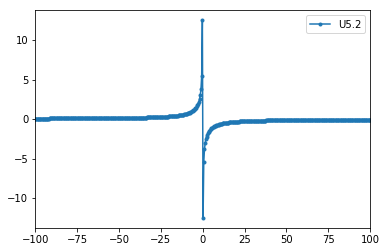

In [23]:
#U=5.2の計算開始
#自己エネルギー。初期値0
#self_energy_iwn=np.zeros_like(w_n)
new_self_energy_iwn_U52=Self_energy_iwn(5.2)
relative_error_U52=np.abs((new_self_energy_iwn_U52-self_energy_iwn).imag/(new_self_energy_iwn_U52.imag))
#相対誤差が０.００0１より小さくなるまでループ
while(np.max(relative_error_U52)>10**(-4)):
    new_self_energy_iwn_U52=Self_energy_iwn(5.2)
    relative_error_U52=np.abs((new_self_energy_iwn_U52-self_energy_iwn).imag/(new_self_energy_iwn_U52.imag))
    self_energy_iwn=k*new_self_energy_iwn_U52+(1-k)*self_energy_iwn
self_energy_iwn_U52=self_energy_iwn
#U=5.2の計算終了

plt.plot(w_n, self_energy_iwn_U52.imag, label='U5.2', marker=".")
plt.xlim([-100,100]) 
plt.legend()
plt.show()


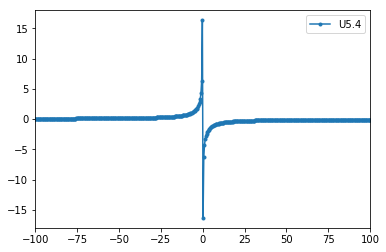

In [22]:

#U=5.4の計算開始
#自己エネルギー。初期値0
#self_energy_iwn=np.zeros_like(w_n)
new_self_energy_iwn_U54=Self_energy_iwn(5.4)
relative_error_U54=np.abs((new_self_energy_iwn_U54-self_energy_iwn).imag/(new_self_energy_iwn_U54.imag))
#相対誤差が０.０0０１より小さくなるまでループ
while(np.max(relative_error_U54)>10**(-3)):
    new_self_energy_iwn_U54=Self_energy_iwn(5.4)
    relative_error_U54=np.abs((new_self_energy_iwn_U54-self_energy_iwn).imag/(new_self_energy_iwn_U54.imag))
    self_energy_iwn=k*new_self_energy_iwn_U54+(1-k)*self_energy_iwn
self_energy_iwn_U54=self_energy_iwn
#U=5.4の計算終了

plt.plot(w_n, self_energy_iwn_U54.imag, label='U5.4', marker=".")
plt.xlim([-100,100]) 
plt.legend()
plt.show()

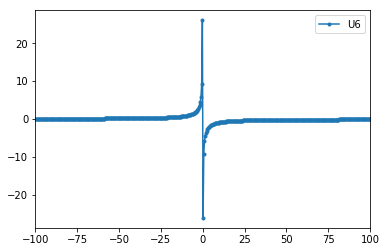

In [12]:

#U=6の計算開始
#自己エネルギー。初期値0
#self_energy_iwn=np.zeros_like(w_n)
new_self_energy_iwn_U6=Self_energy_iwn(6)
relative_error_U6=np.abs((new_self_energy_iwn_U6-self_energy_iwn).imag/(new_self_energy_iwn_U6.imag))
#相対誤差が０.００0１より小さくなるまでループ
while(np.max(relative_error_U6)>10**(-4)):
    new_self_energy_iwn_U6=Self_energy_iwn(6)
    relative_error_U6=np.abs((new_self_energy_iwn_U6-self_energy_iwn).imag/(new_self_energy_iwn_U6.imag))
    self_energy_iwn=k*new_self_energy_iwn_U6+(1-k)*self_energy_iwn
self_energy_iwn_U6=self_energy_iwn
#U=6の計算終了

plt.plot(w_n, self_energy_iwn_U6.imag, label='U6', marker=".")
plt.xlim([-100,100]) 
plt.legend()
plt.show()

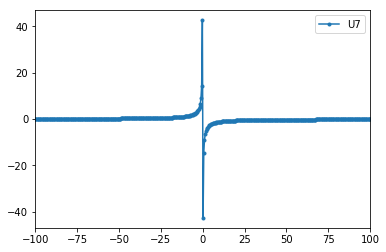

In [13]:


#U=7の計算開始
#自己エネルギー。初期値0
#self_energy_iwn=np.zeros_like(w_n)
new_self_energy_iwn_U7=Self_energy_iwn(7)
relative_error_U7=np.abs((new_self_energy_iwn_U7-self_energy_iwn).imag/(new_self_energy_iwn_U7.imag))
#相対誤差が０.００0１より小さくなるまでループ
while(np.max(relative_error_U7)>10**(-4)):
    new_self_energy_iwn_U7=Self_energy_iwn(7)
    relative_error_U7=np.abs((new_self_energy_iwn_U7-self_energy_iwn).imag/(new_self_energy_iwn_U7.imag))
    self_energy_iwn=k*new_self_energy_iwn_U7+(1-k)*self_energy_iwn
self_energy_iwn_U7=self_energy_iwn
#U=10の計算終了

plt.plot(w_n, self_energy_iwn_U7.imag, label='U7', marker=".")
plt.xlim([-100,100]) 
plt.legend()
plt.show()


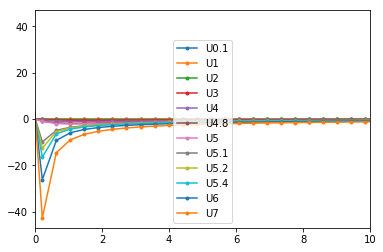

In [26]:
#U=0.1,1,2,3,4,5.4,6,7のグラフまとめ
plt.plot(w_n, self_energy_iwn_U01.imag, label='U0.1', marker=".")
plt.plot(w_n, self_energy_iwn_U1.imag, label='U1', marker=".")
plt.plot(w_n, self_energy_iwn_U2.imag, label='U2', marker=".")
plt.plot(w_n, self_energy_iwn_U3.imag, label='U3', marker=".")
plt.plot(w_n, self_energy_iwn_U4.imag, label='U4', marker=".")
plt.plot(w_n, self_energy_iwn_U48.imag, label='U4.8', marker=".")
plt.plot(w_n, self_energy_iwn_U5.imag, label='U5', marker=".")
plt.plot(w_n, self_energy_iwn_U51.imag, label='U5.1', marker=".")
plt.plot(w_n, self_energy_iwn_U52.imag, label='U5.2', marker=".")
plt.plot(w_n, self_energy_iwn_U54.imag, label='U5.4', marker=".")
plt.plot(w_n, self_energy_iwn_U6.imag, label='U6', marker=".")
plt.plot(w_n, self_energy_iwn_U7.imag, label='U7', marker=".")
plt.xlim([0,10]) 
plt.legend()
plt.show()

[ -1.69137920e-04  -1.72572128e-02  -7.36400218e-02  -1.87379707e-01
  -4.14449340e-01  -8.26024557e-01  -1.02494729e+00  -9.82552390e+00
  -1.25135520e+01  -1.63555206e+01  -2.60599211e+01  -4.25953085e+01]
-0.000169137919836
[ 0.99919308  0.92387533  0.73986102  0.52779579  0.33570004  0.20226632
  0.16967089  0.02087098  0.0164615   0.01264353  0.00797277  0.0048929 ]


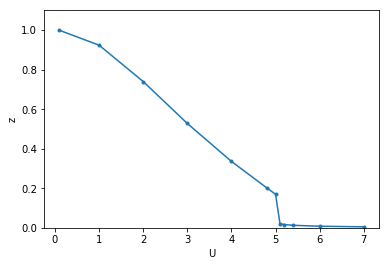

In [27]:
U=np.array([0.1,1,2,3,4,4.8,5,5.1,5.2,5.4,6,7])
self_energy_lowest=np.array([self_energy_iwn_U01.imag[1000],self_energy_iwn_U1.imag[1000],\
                             self_energy_iwn_U2.imag[1000],self_energy_iwn_U3.imag[1000],self_energy_iwn_U4.imag[1000],\
                             self_energy_iwn_U48.imag[1000],self_energy_iwn_U5.imag[1000],self_energy_iwn_U51.imag[1000],self_energy_iwn_U52.imag[1000],\
                             self_energy_iwn_U54.imag[1000],self_energy_iwn_U6.imag[1000],self_energy_iwn_U7.imag[1000]])
print(self_energy_lowest)
w_0=np.pi/beta
z=1/(1-self_energy_lowest/w_0)
print(self_energy_iwn_U01.imag[1000])
print(z)
plt.plot(U ,z , marker=".")
plt.ylim([0,1.1]) 
plt.xlabel("U")
plt.ylabel("z")
plt.show()

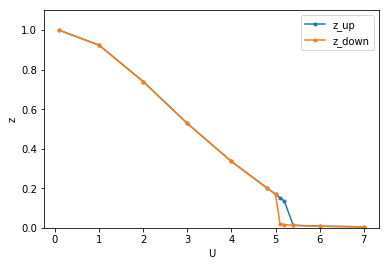

In [28]:
U=[0.1,1,2,3,4,4.8,5,5.1,5.2,5.4,6,7]
#Uを0から上げていったときのz
z_up= [0.99919308,  0.92387533,  0.73986102,  0.52779579 , 0.33570004,  0.20226632,0.16972987,  0.15276323,  0.13448448,  0.01270212,  0.00797277,  0.0048929] 
#Uを７から下げていったときのz
z_down=[ 0.99919308,  0.92387533,  0.73986102,  0.52779579,  0.33570004,  0.20226632,
  0.16967089,  0.02087098,  0.0164615,   0.01264353,  0.00797277,  0.0048929, ]

plt.plot(U ,z_up, label='z_up' , marker=".")
plt.plot(U,z_down , label='z_down', marker=".")
plt.ylim([0,1.1]) 
plt.xlabel("U")
plt.ylabel("z")
plt.legend()
plt.show()



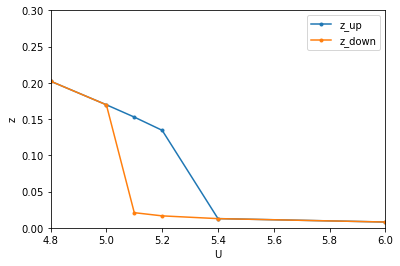

In [36]:
#二つの２で違う部分を拡大。
plt.plot(U ,z_up, label='z_up' , marker=".")
plt.plot(U,z_down , label='z_down', marker=".")
plt.xlim([4.8,6]) 
plt.ylim([0,0.3]) 
plt.xlabel("U")
plt.ylabel("z")
plt.legend()
plt.show()
